In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
from matplotlib import pyplot as plt

from modules import Potential, ROM, FOM
from modules.Plot import setup_rc_params
setup_rc_params()

In [21]:
save_figures = True

dpi = 400
tick_size = 24

In [22]:
seed = 9

np.random.seed(seed)

In [23]:
r = np.linspace(0, 12, 1000)

pad = 8
parameter_bounds = {"V_r": [0 + pad, 400 - pad], "V_s": [-400 + pad, 0 - pad]}



def linear_mapping(x, x_min, x_max):
    return (x_max - x_min) * x + x_min

number_of_starting_snapshots = 1
starting_snapshots = []
for i in np.arange(number_of_starting_snapshots):
    random_1, random_2 = np.random.random(2)
    V_r = linear_mapping(random_1, *parameter_bounds["V_r"])
    V_s = linear_mapping(random_1, *parameter_bounds["V_s"])
    starting_snapshots.append({"V_r": V_r, "V_s": V_s})

In [24]:
l = ll = j = 0
S = 0

potential = Potential.Potential("minnesota", r, l=l, ll=ll, j=j, S=S)
solver = FOM.MatrixNumerovSolver(potential, use_ab=False)
greedy_emulator = ROM.Emulator(parameter_bounds, 
                               solver,
                               param_pts=100,
                               ignore_error_bounds=True,
                               use_scaled_estimated_error=True,
                               emulation_method="LSPG-ROM", 
                               error_estimation_method="LSPG-ROM",
                               sampling_method="LHS",
                               snapshot_parameters=starting_snapshots,
                               snapshot_max=6,
                               seed=seed,
                               verbose=False)

greedy_emulator.train()

/Users/joshuamaldonado/Documents/GitHub/cs_greedy_emulator_josh/modules/SpecialFunctions.py:56: RuntimeWarning: invalid value encountered in multiply
  riccati_bessel_G = -rho * spherical_yn(l, rho)


1


/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_71552/2088947333.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


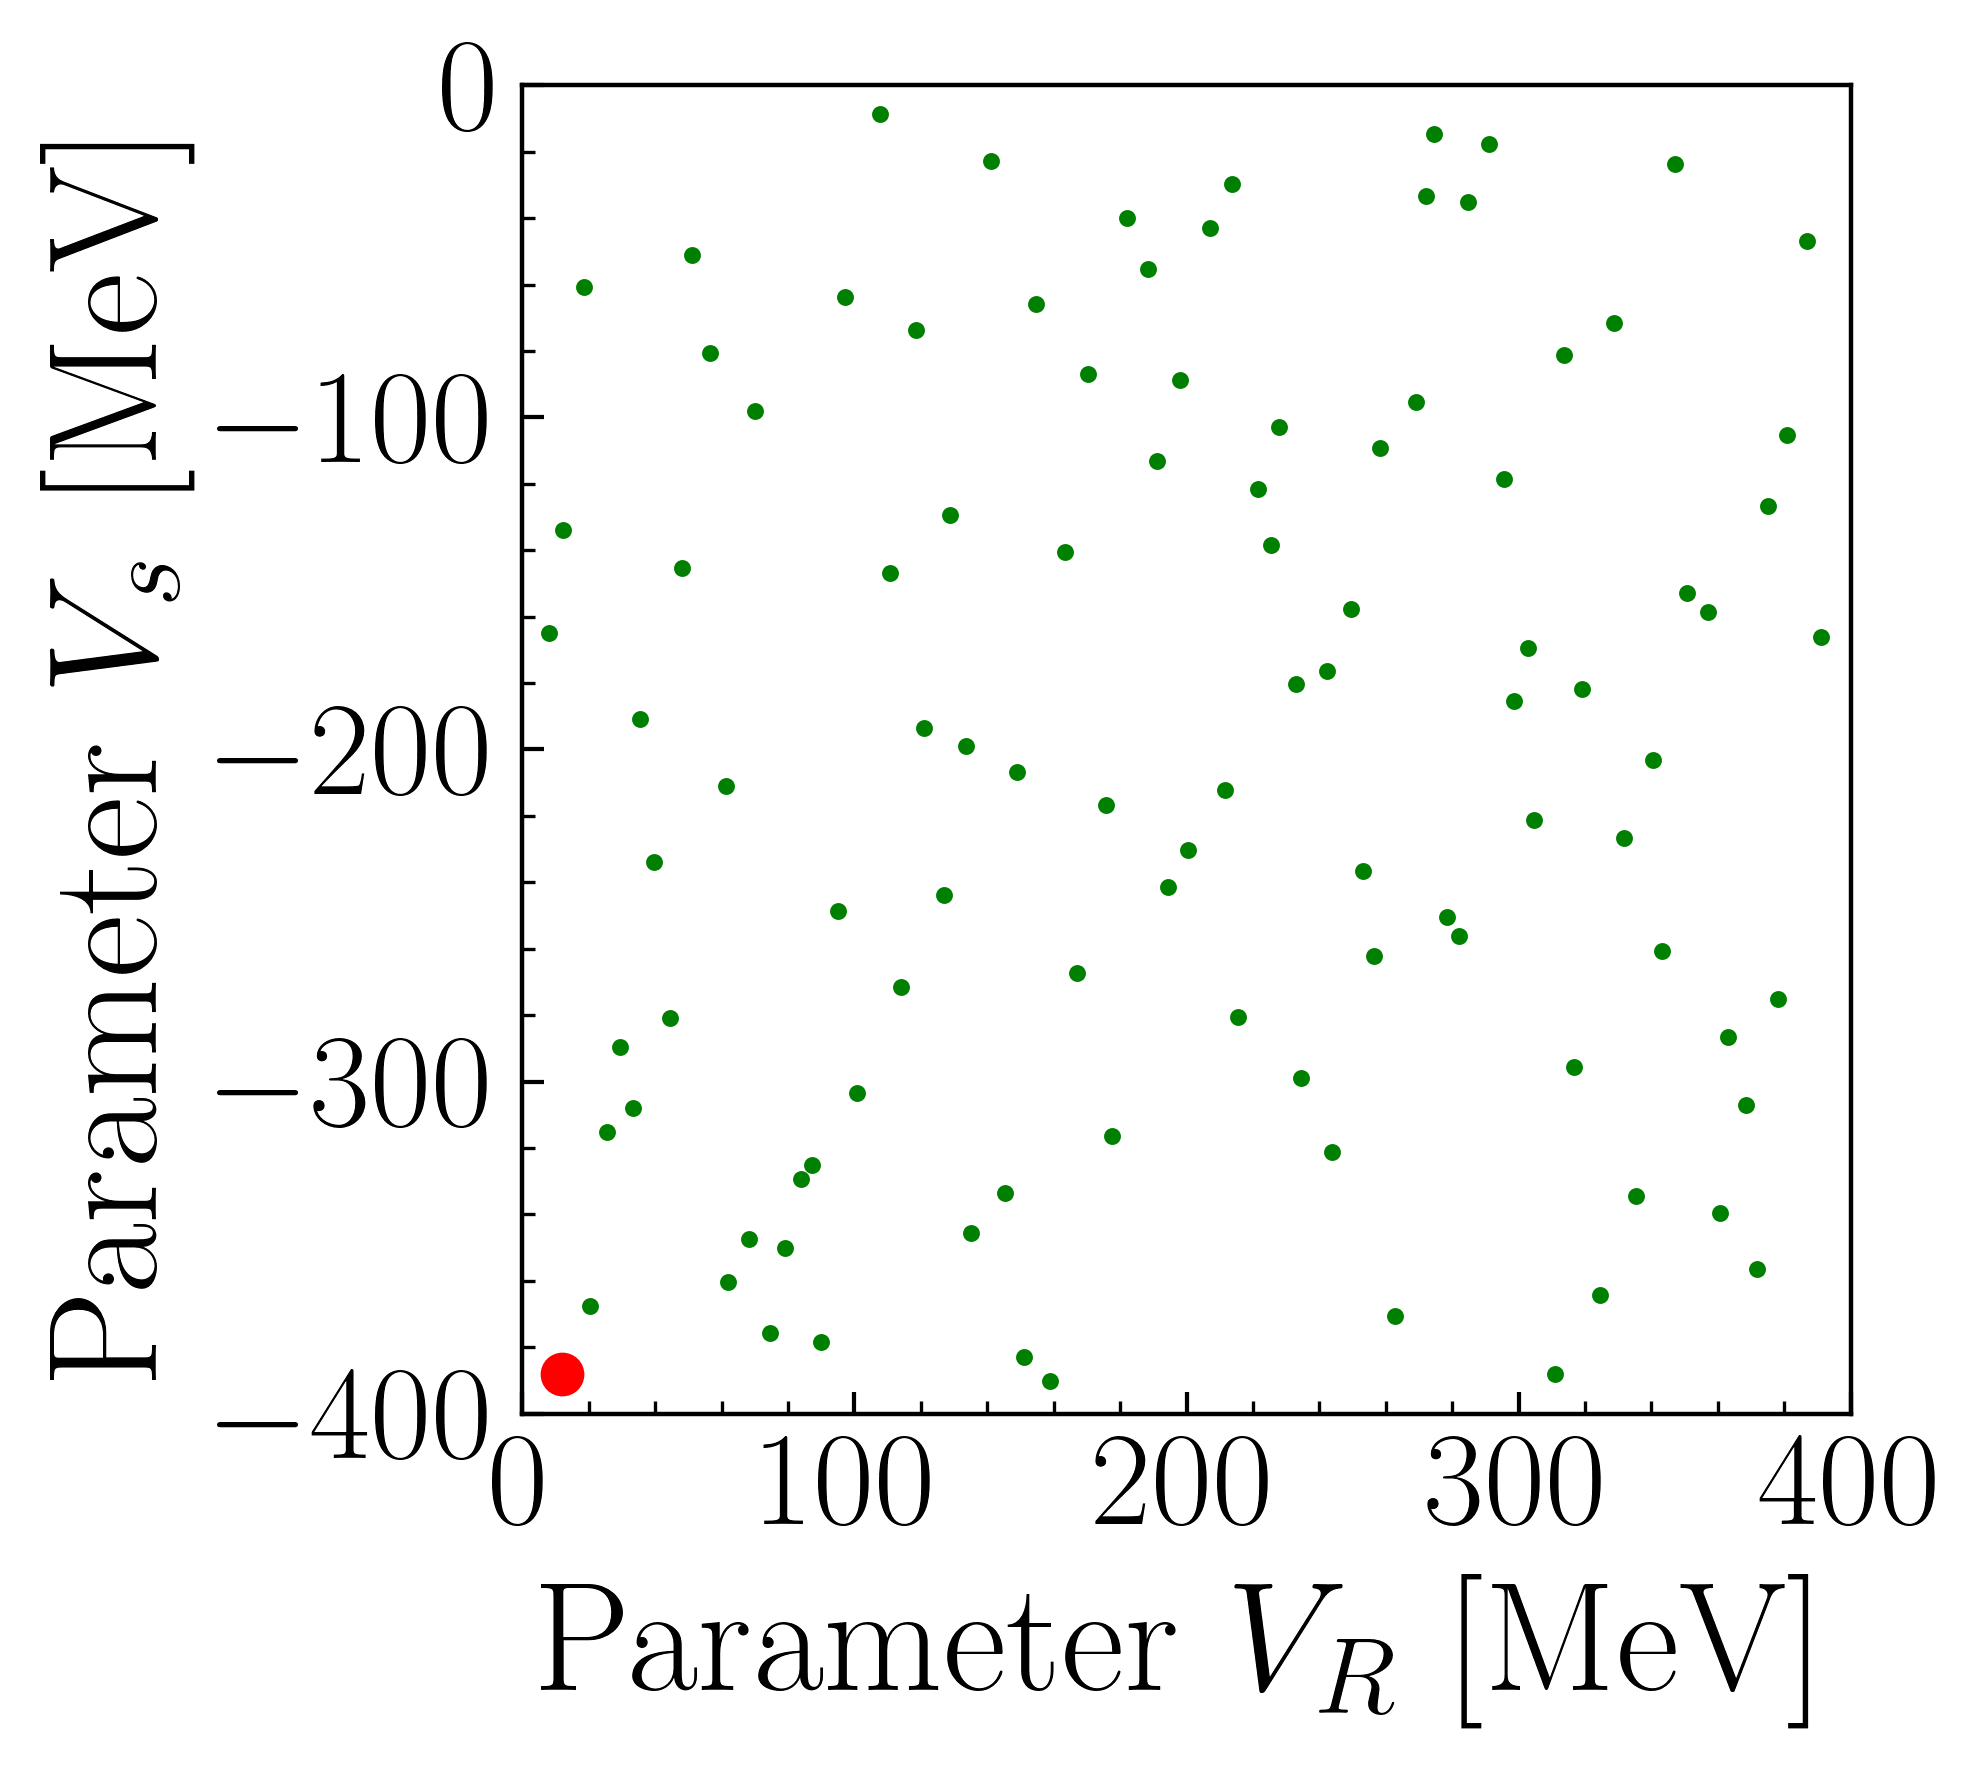

2


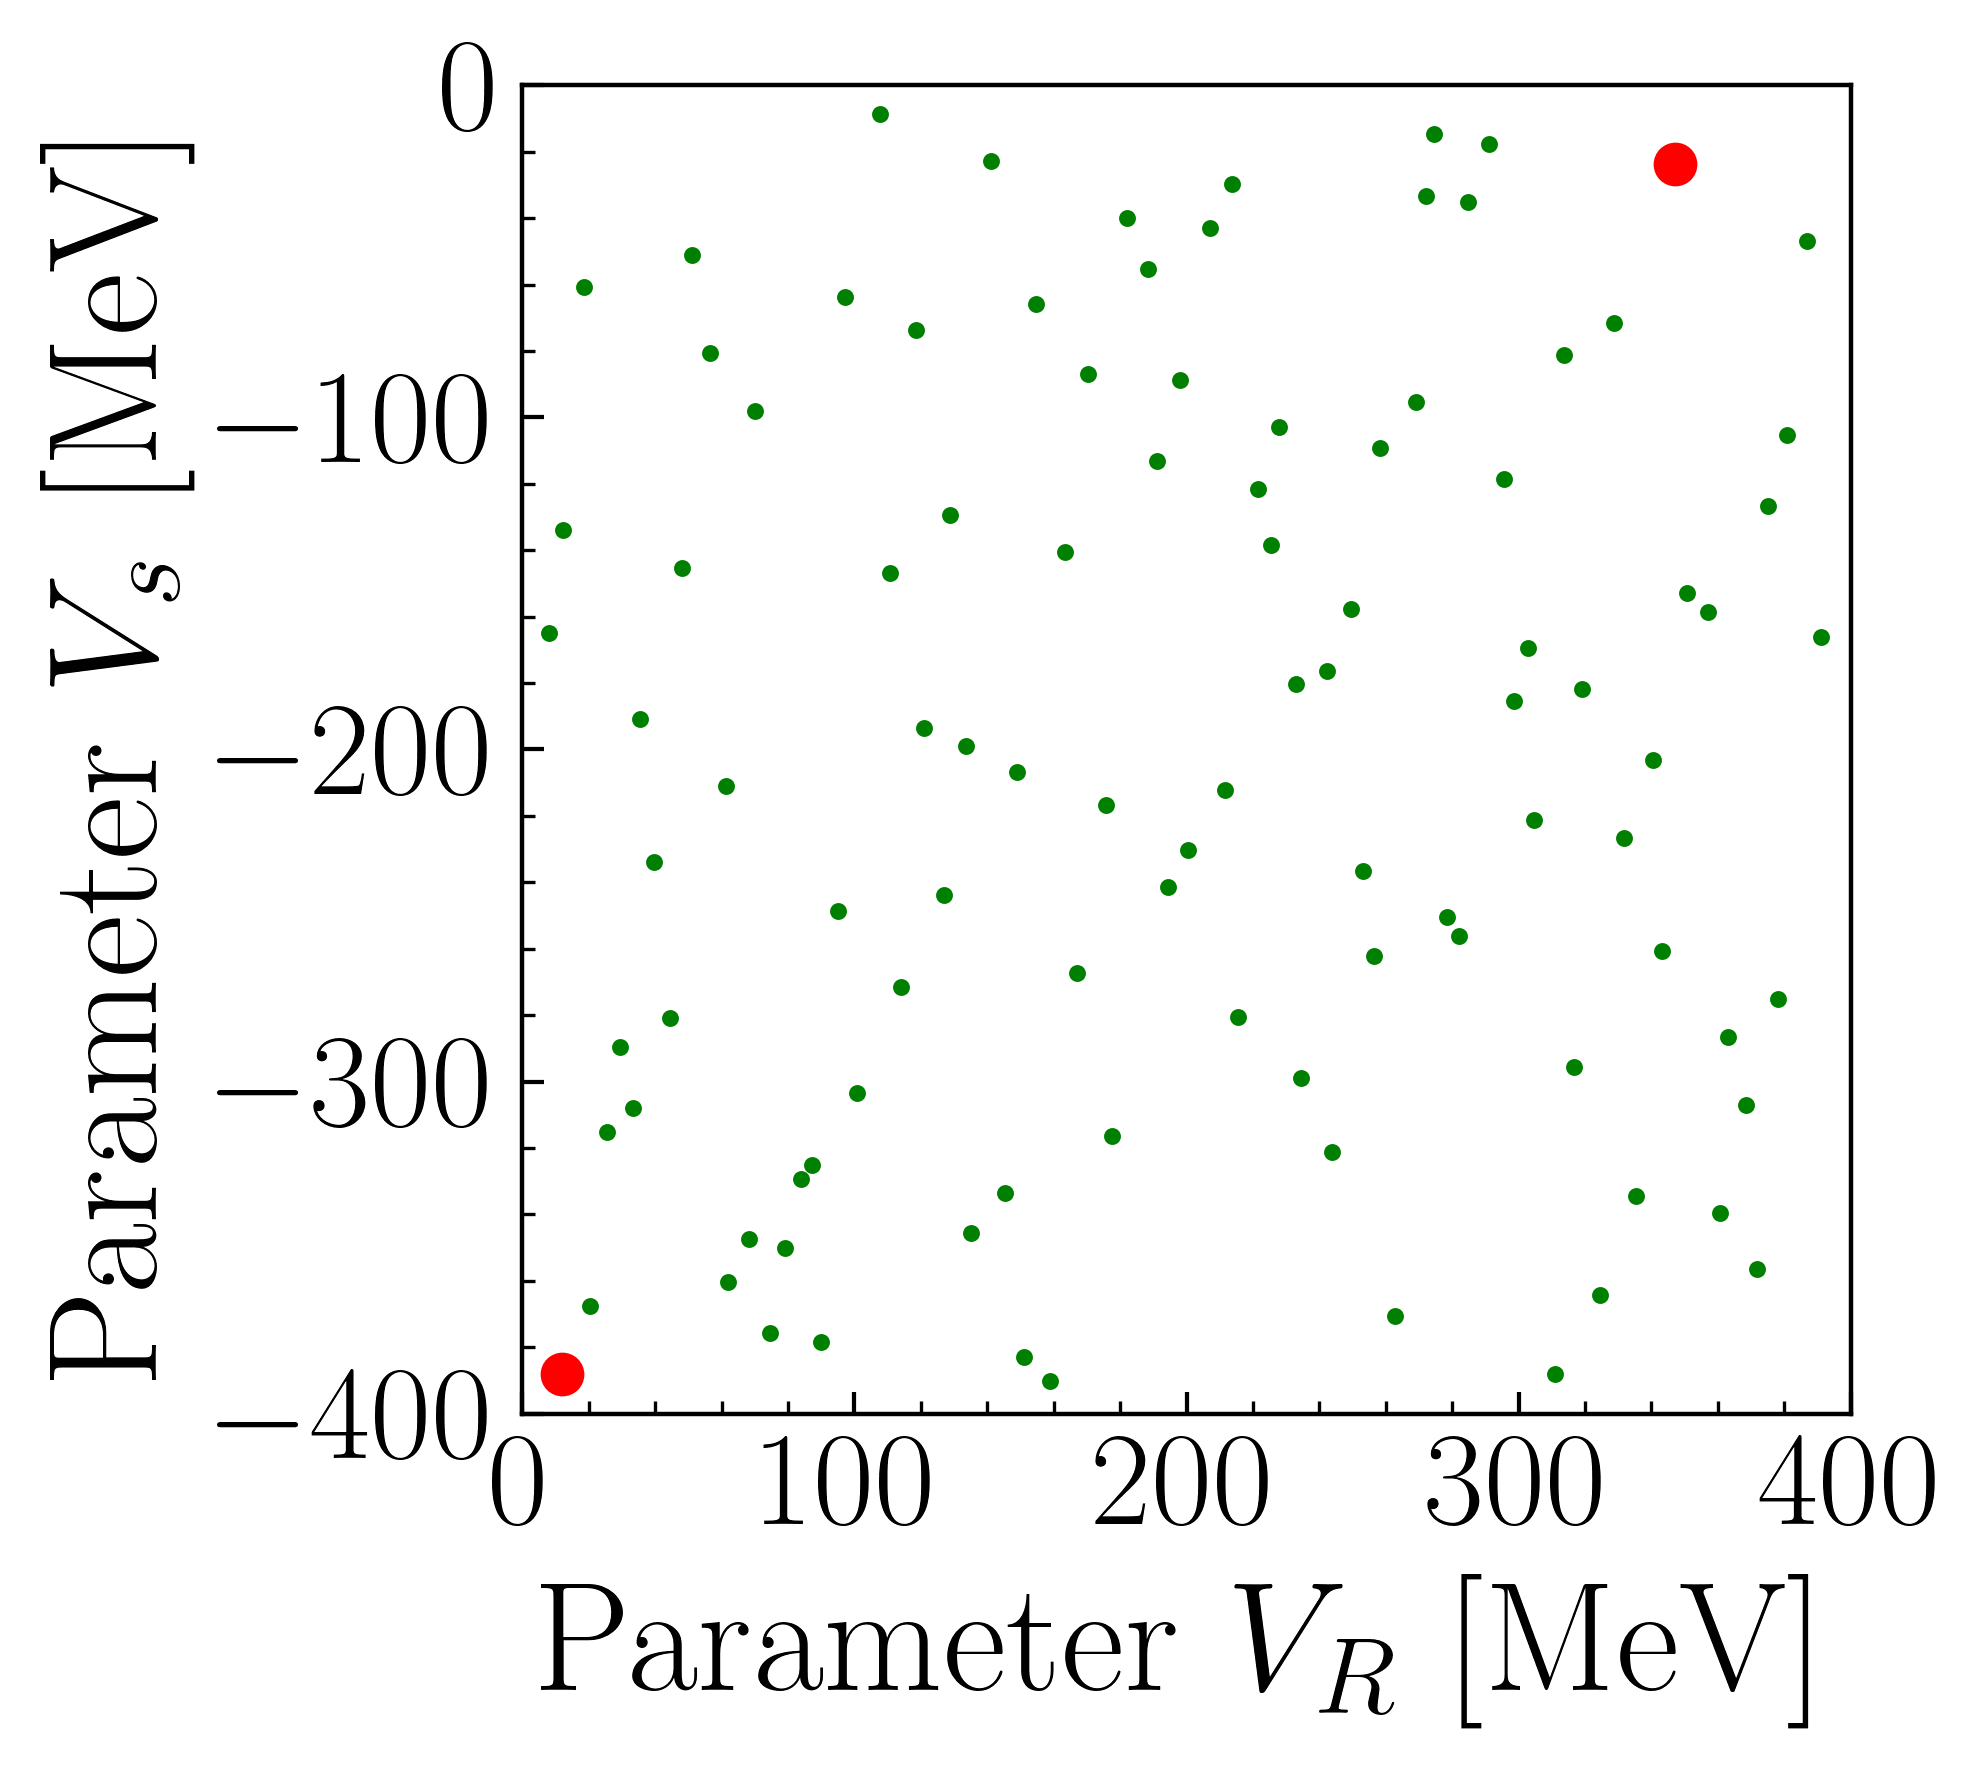

3


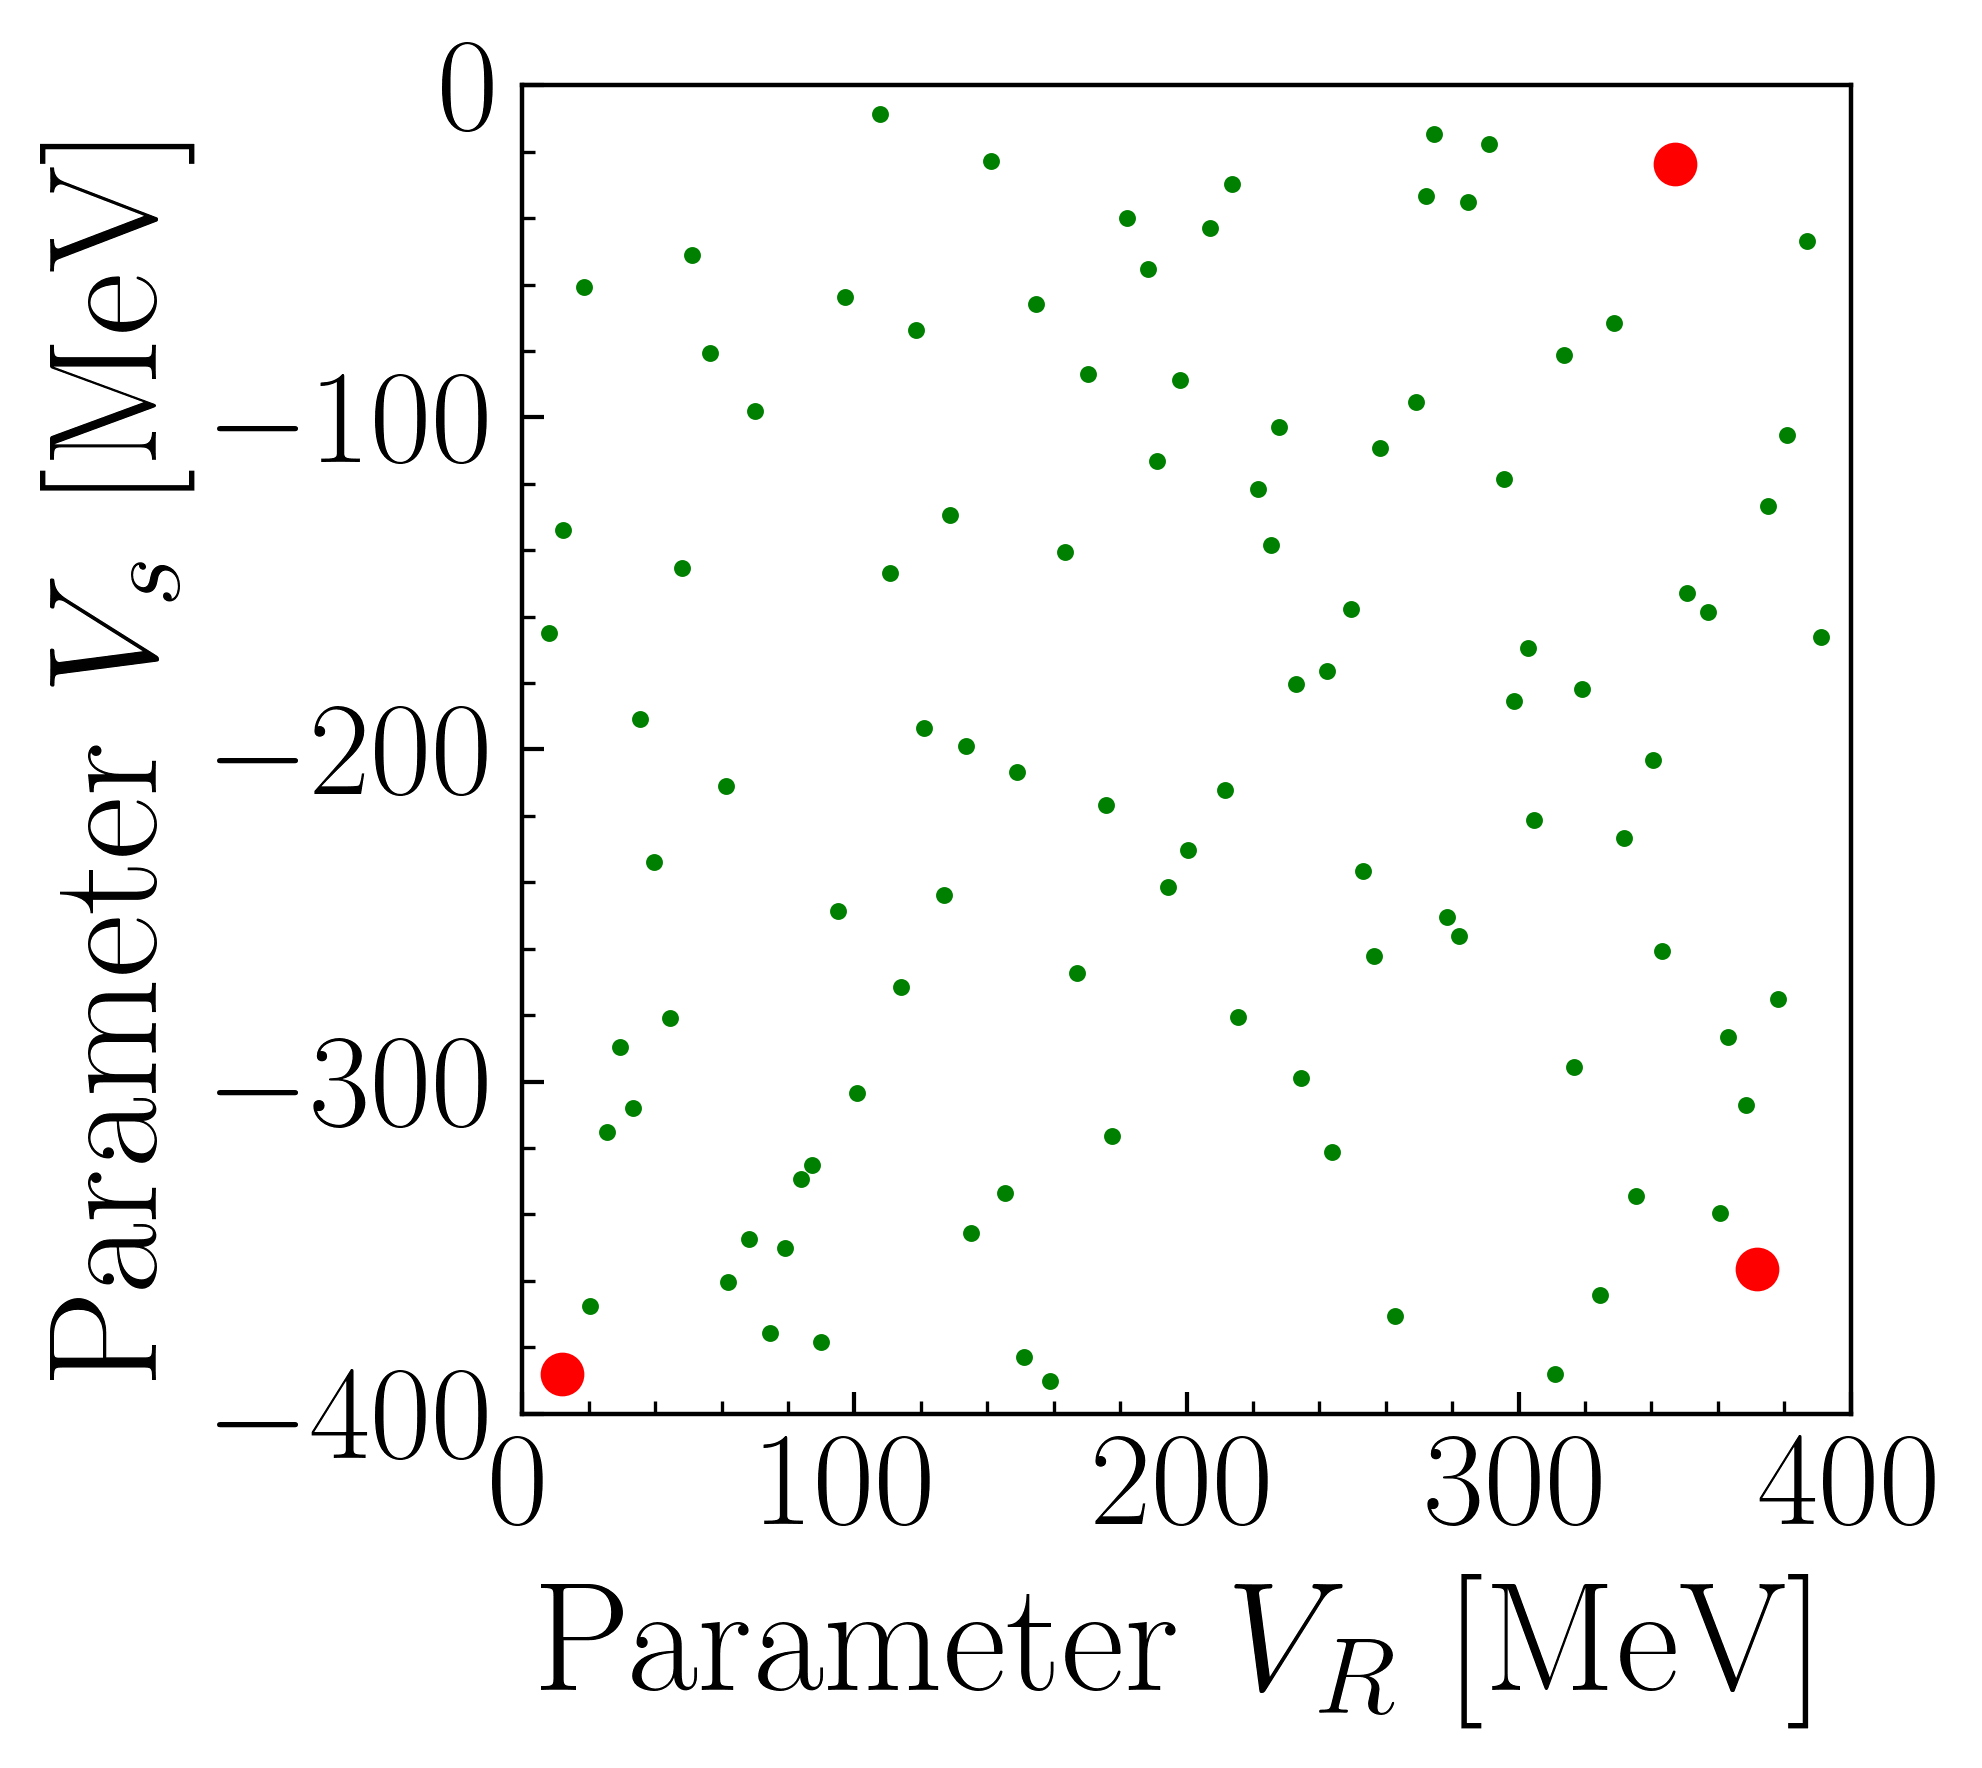

4


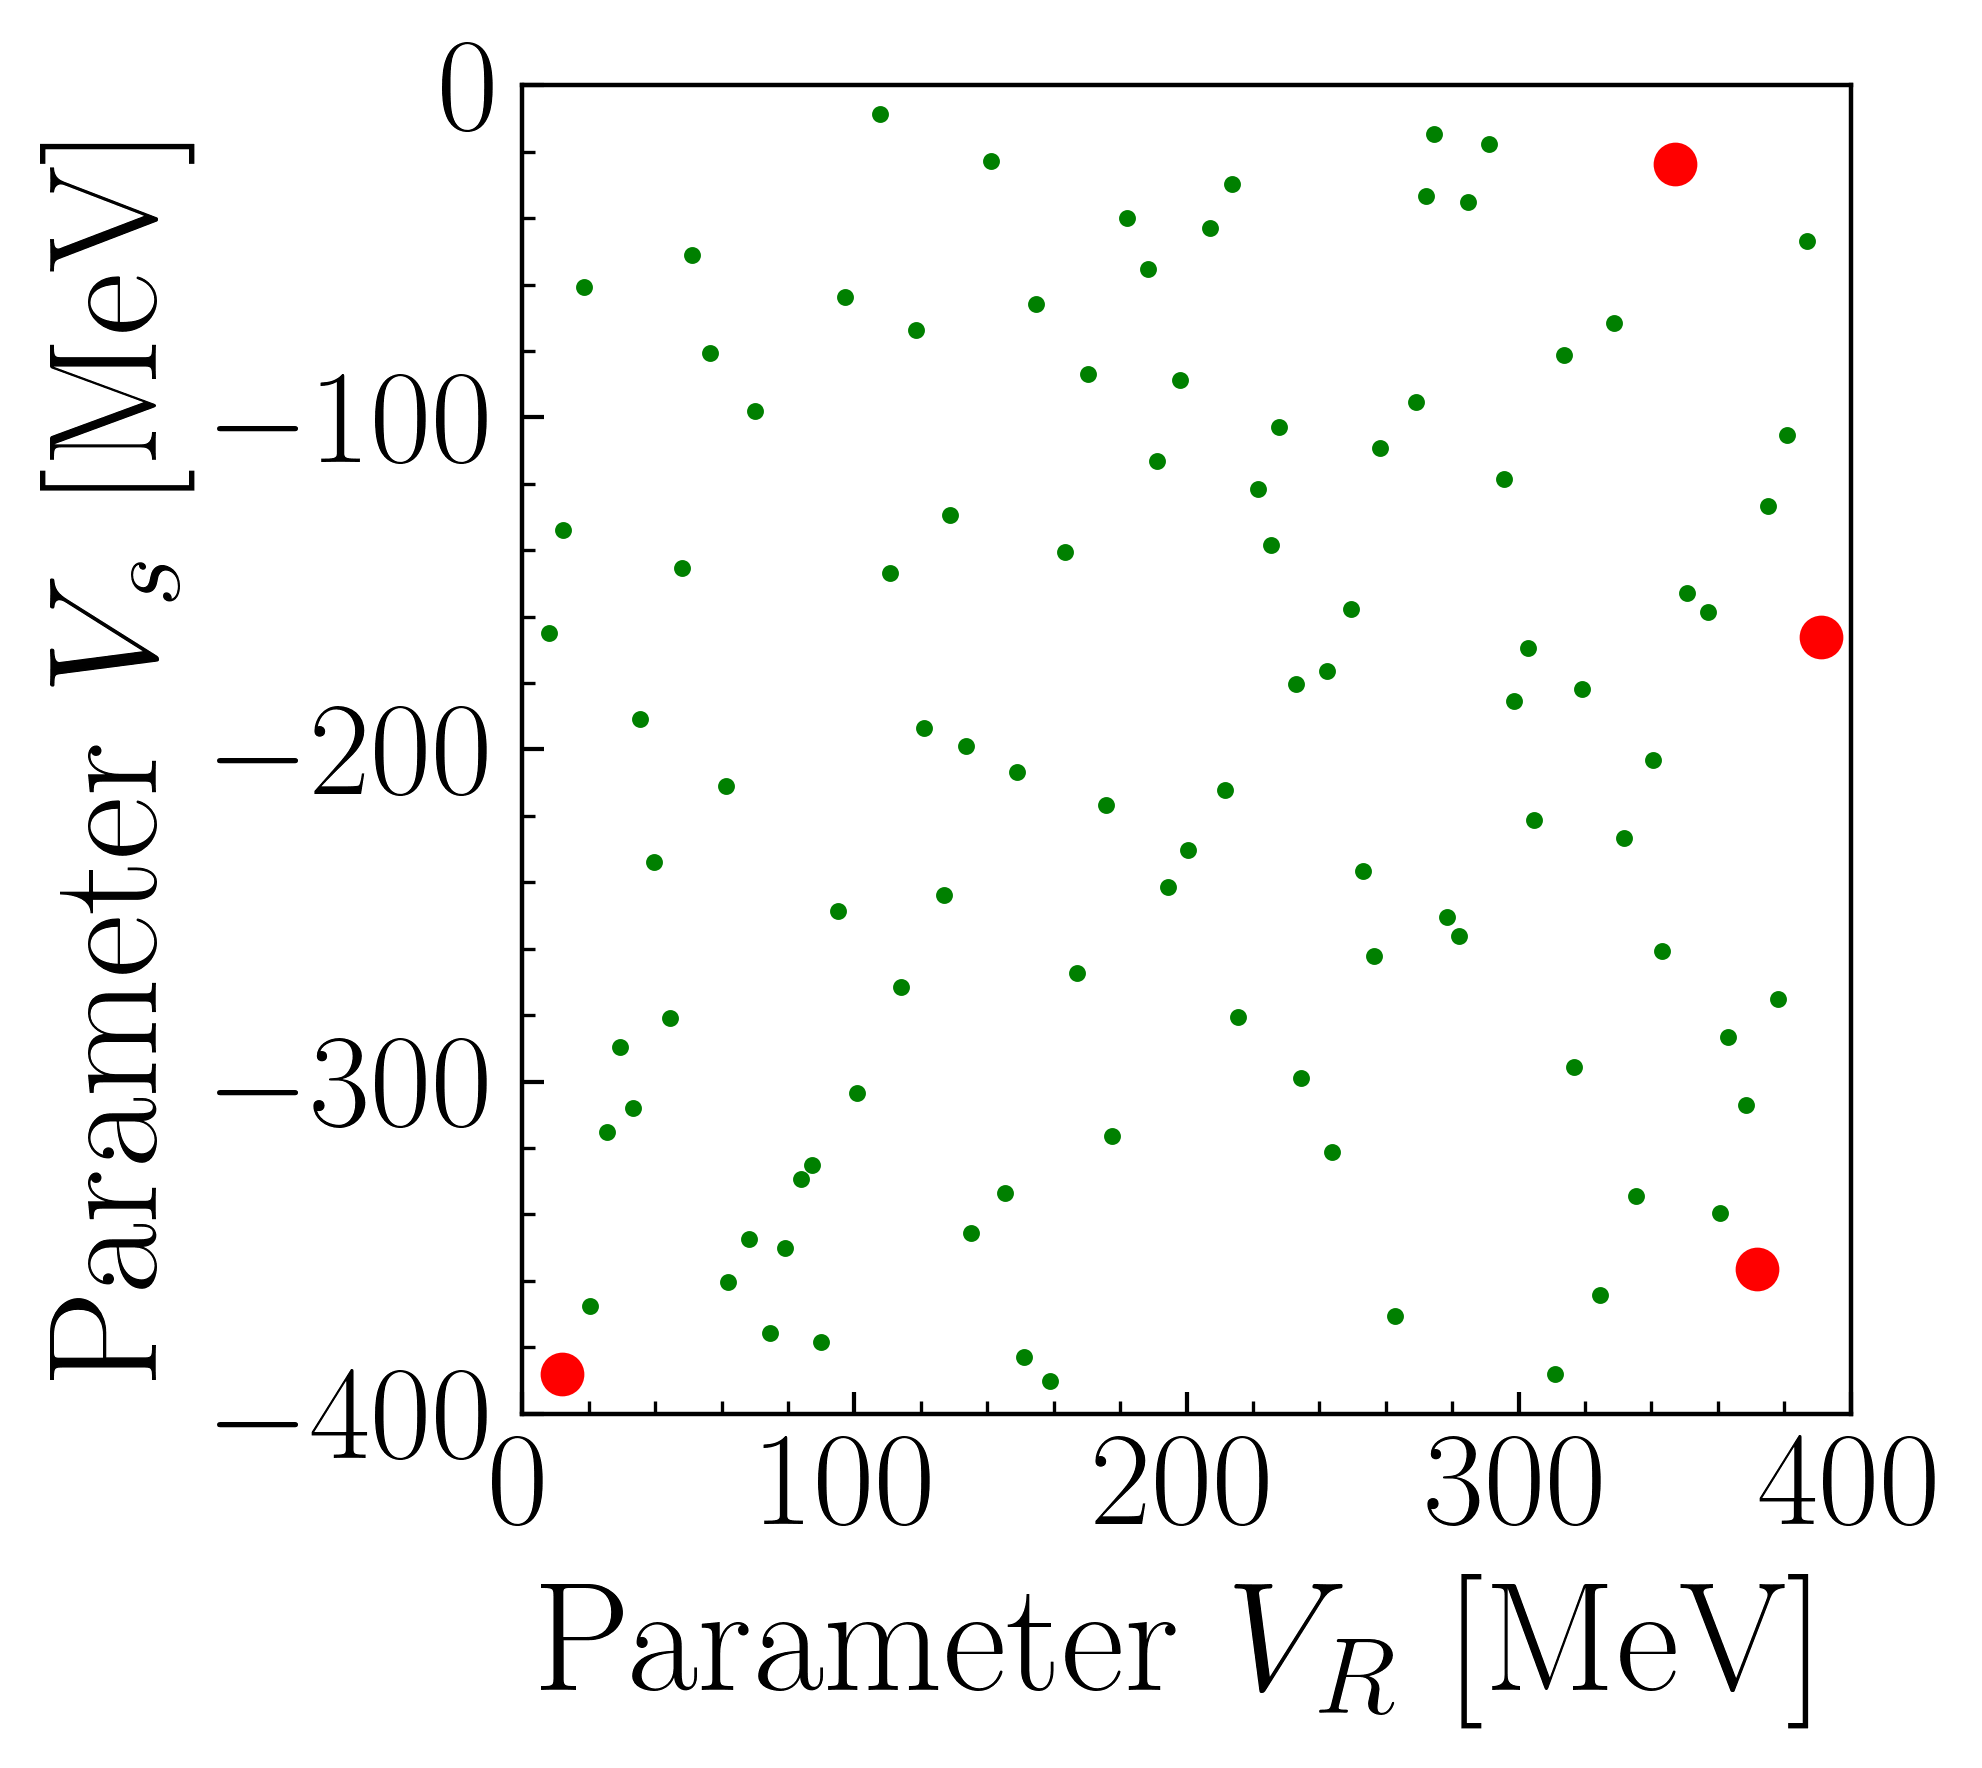

5


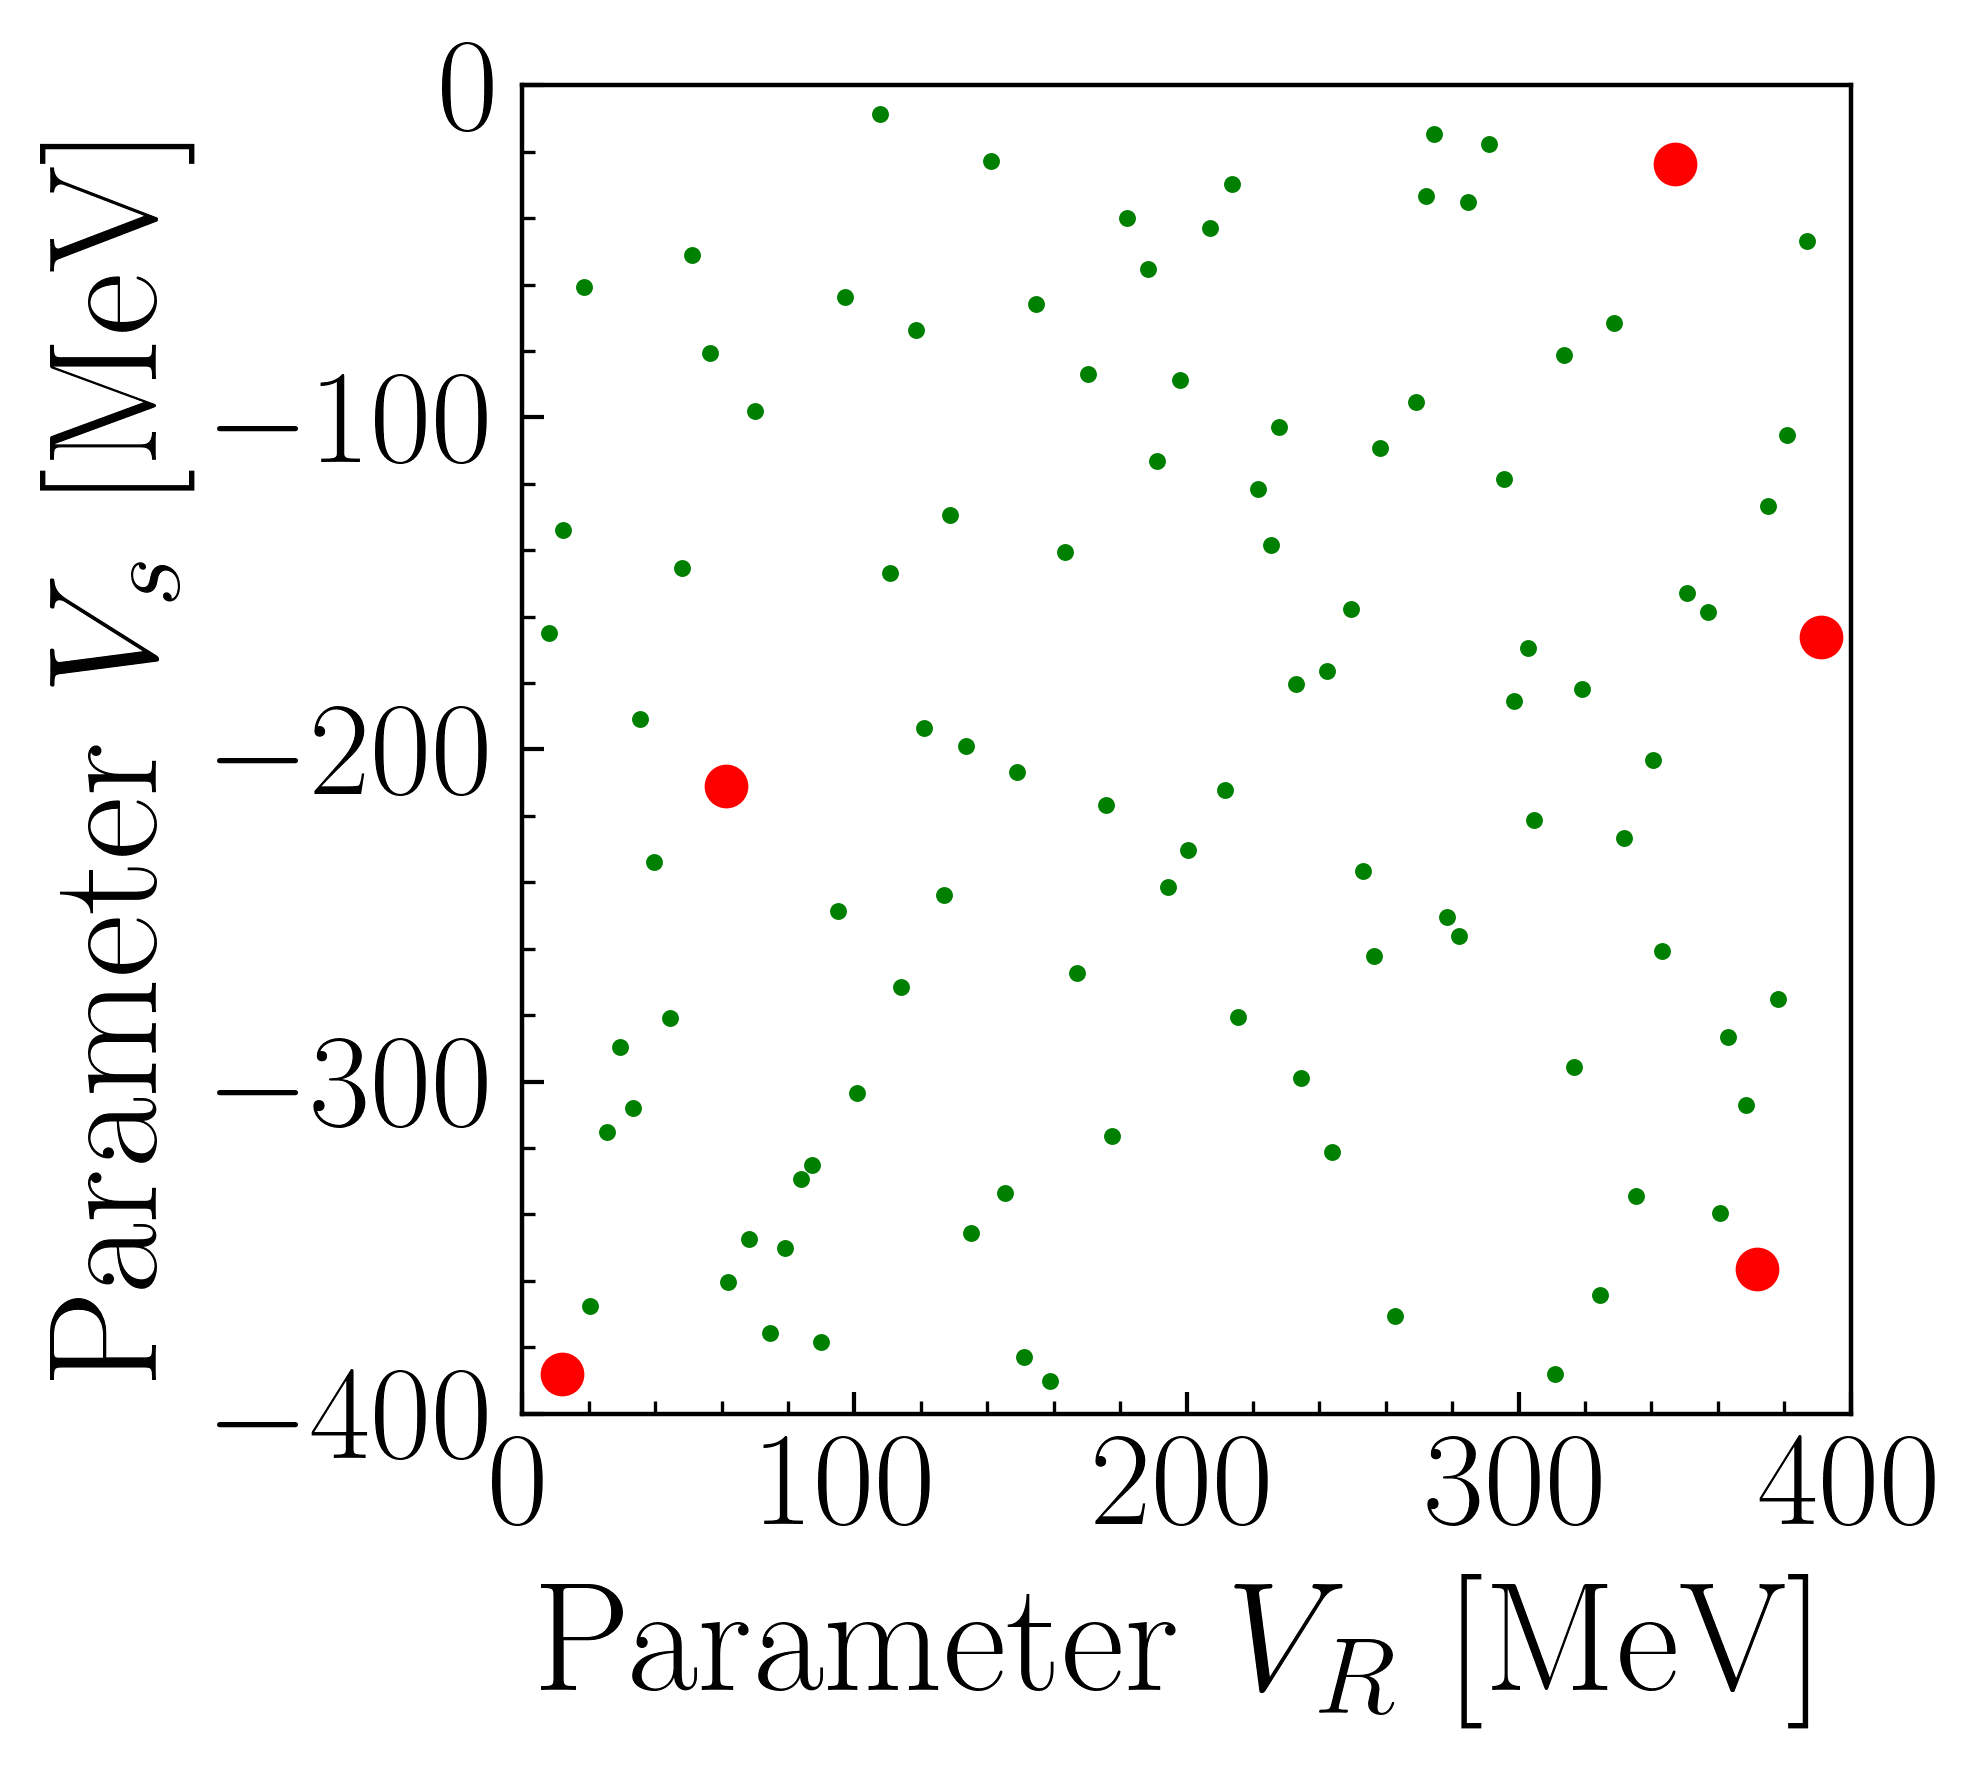

6


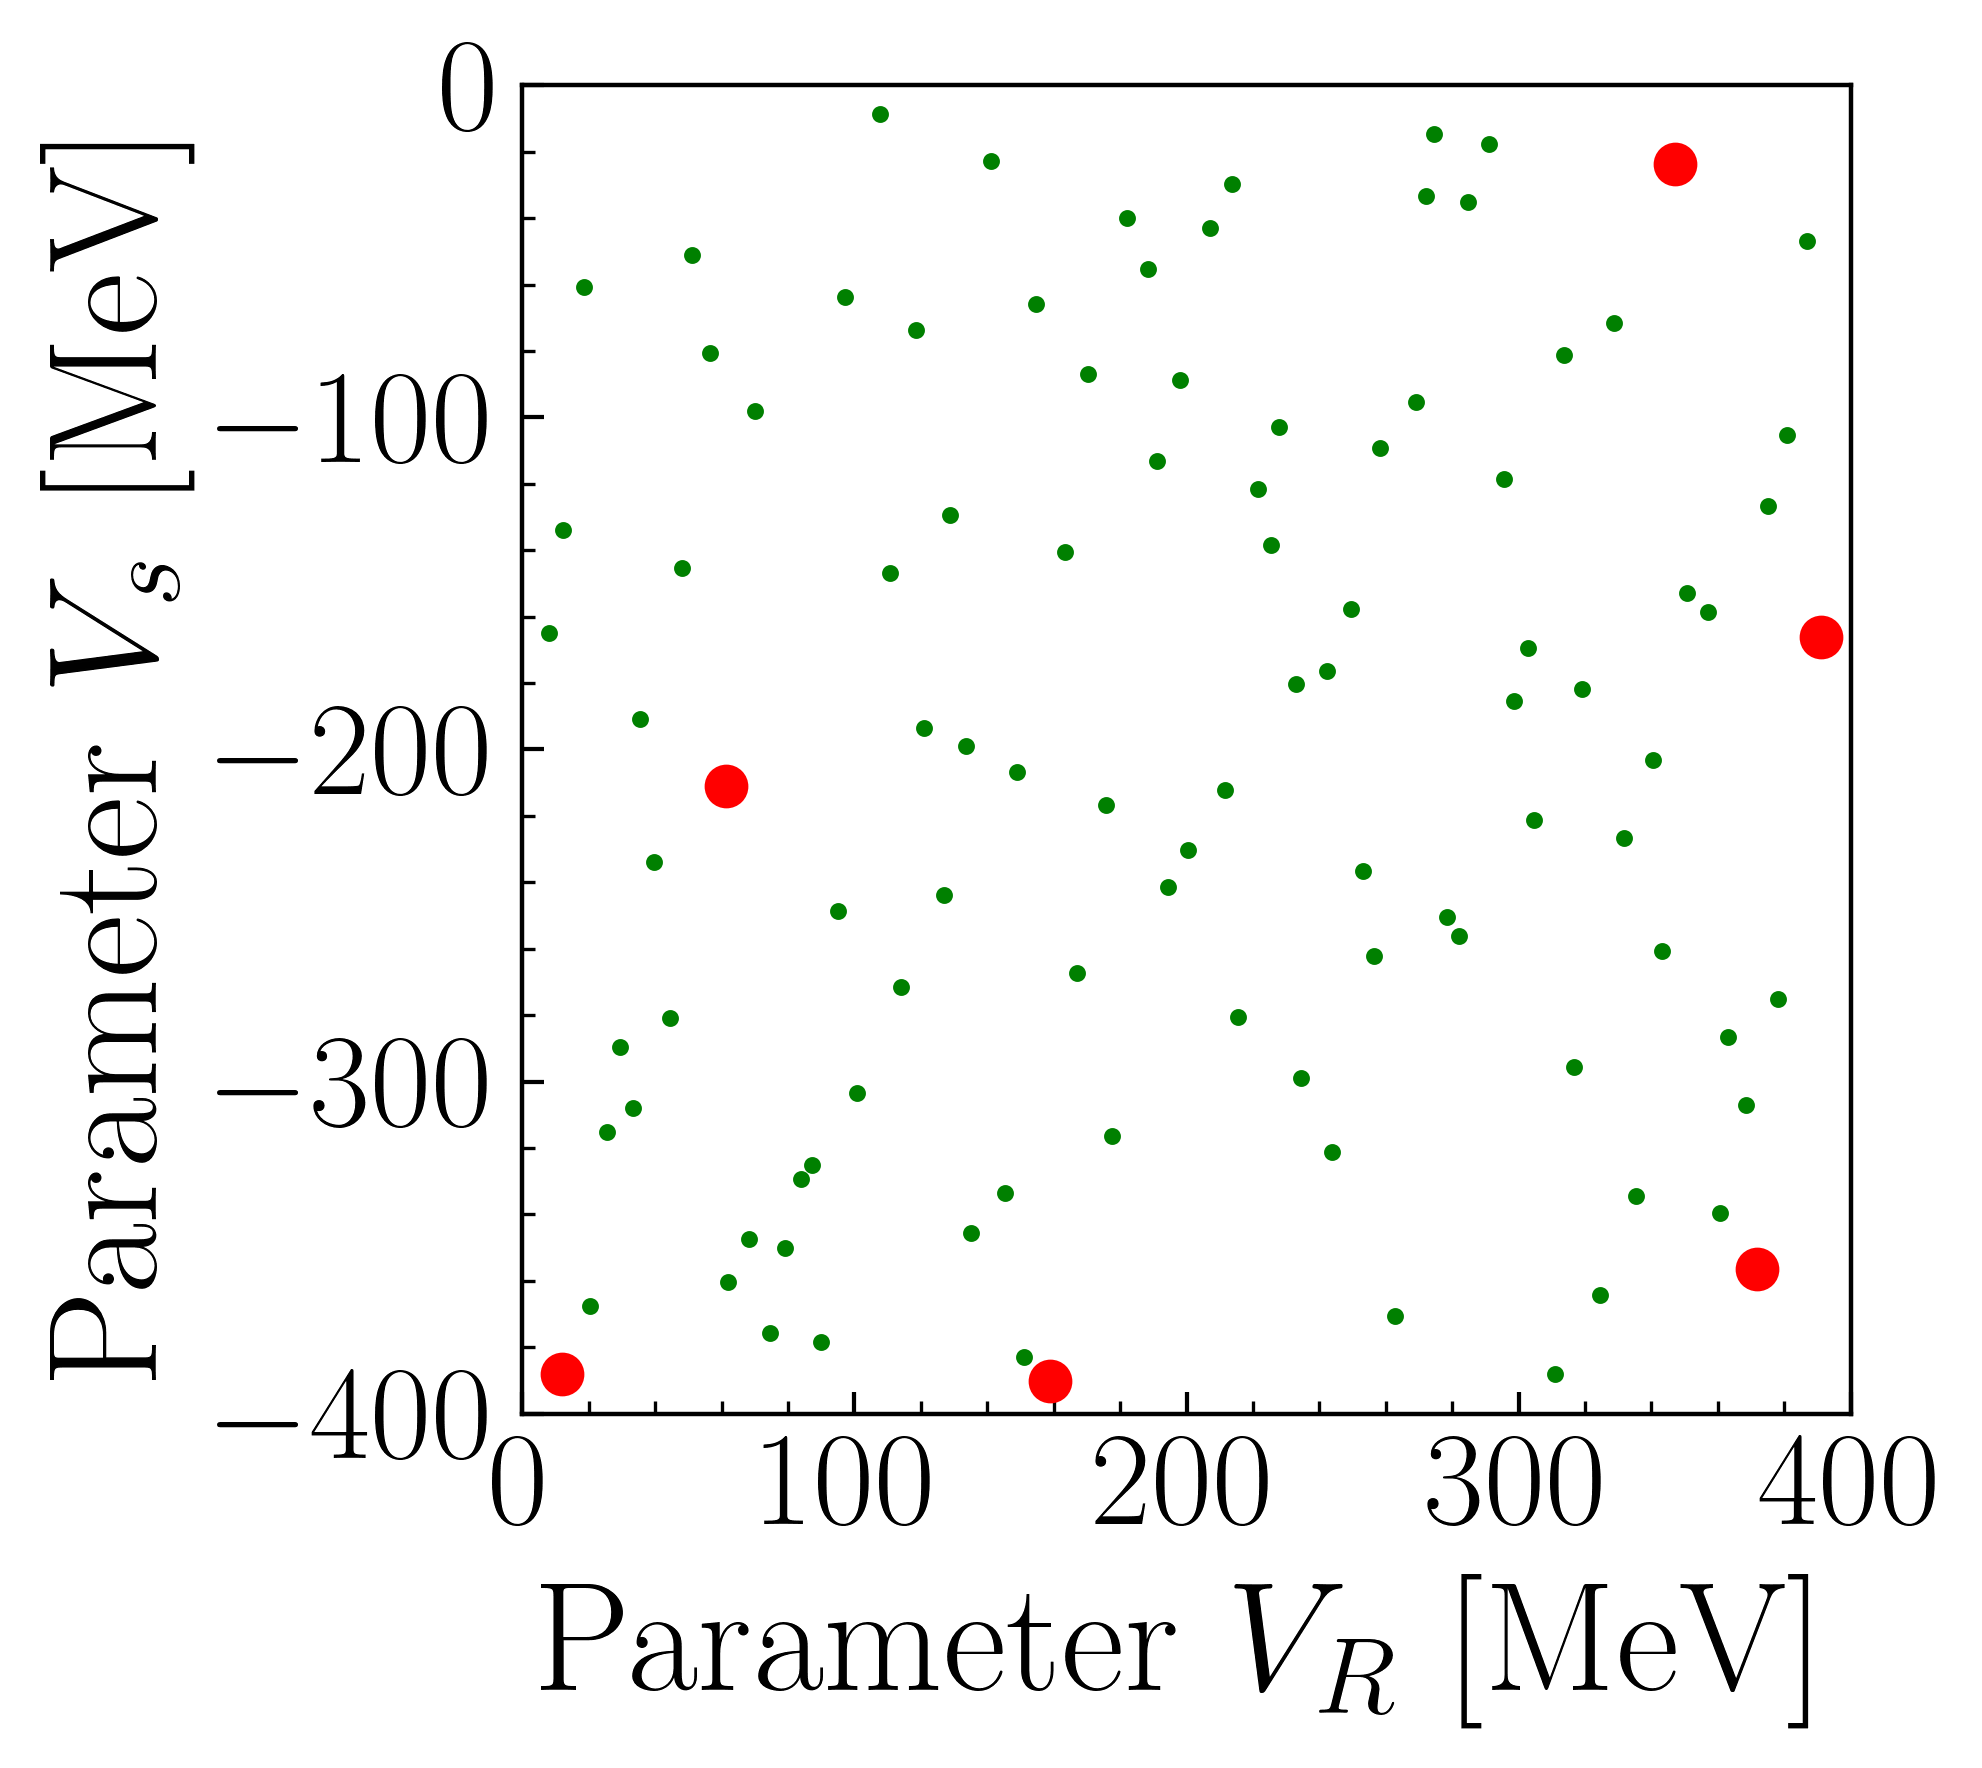

In [25]:
# font stuff:
# from matplotlib.font_manager import FontProperties
# axes_font_properties = FontProperties(weight="extra bold", size=tick_size + 6)
# axes_font_properties = None

# plt.rcParams.update({"axes.labelweight": "bold", "font.size": tick_size + 6})


# plot stuff:
parameter_space = greedy_emulator.parameter_space.copy()
buffer = 0
for i in np.arange(number_of_starting_snapshots, len(greedy_emulator.snapshot_parameters) + 1):
    fig, ax = plt.subplots(1, 1, dpi=dpi, figsize=(5, 5))
    
    ax.scatter(parameter_space["V_r"], parameter_space["V_s"], s=5, color="green", zorder=2)
    for j in np.arange(i):
        ax.scatter(greedy_emulator.snapshot_parameters[j]["V_r"],
                    greedy_emulator.snapshot_parameters[j]["V_s"], color="red", s=50, zorder=3)
    
    # ax.set_xlabel(r"\textbf{Parameter  $V_R$ [MeV]}", fontsize=tick_size + 2)
    # ax.set_ylabel(r"\textbf{Parameter  $V_s$ [MeV]}", fontsize=tick_size + 2)
    ax.set_xlabel("Parameter  $V_R$ [MeV]", fontsize=tick_size + 4)
    ax.set_ylabel("Parameter  $V_s$ [MeV]", fontsize=tick_size + 4)
    ax.set_xlim(np.min(parameter_space["V_r"]) - buffer, 
                np.max(parameter_space["V_r"]) + buffer)
    ax.set_xticks([0, 100, 200, 300, 400])
    ax.set_ylim(np.min(parameter_space["V_s"]) - buffer, 
                np.max(parameter_space["V_s"]) + buffer)
    ax.set_yticks([-400, -300, -200, -100, 0])
    
    ax.xaxis.set_tick_params(labelsize=tick_size)
    ax.yaxis.set_tick_params(labelsize=tick_size)
    
    ax.set_aspect('equal')
    plt.tight_layout()
    if save_figures:
        print(i)
        plt.savefig(f"./figures/greedy_{i}_with_green_dots.png")
    plt.show()


/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_71552/2197196128.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


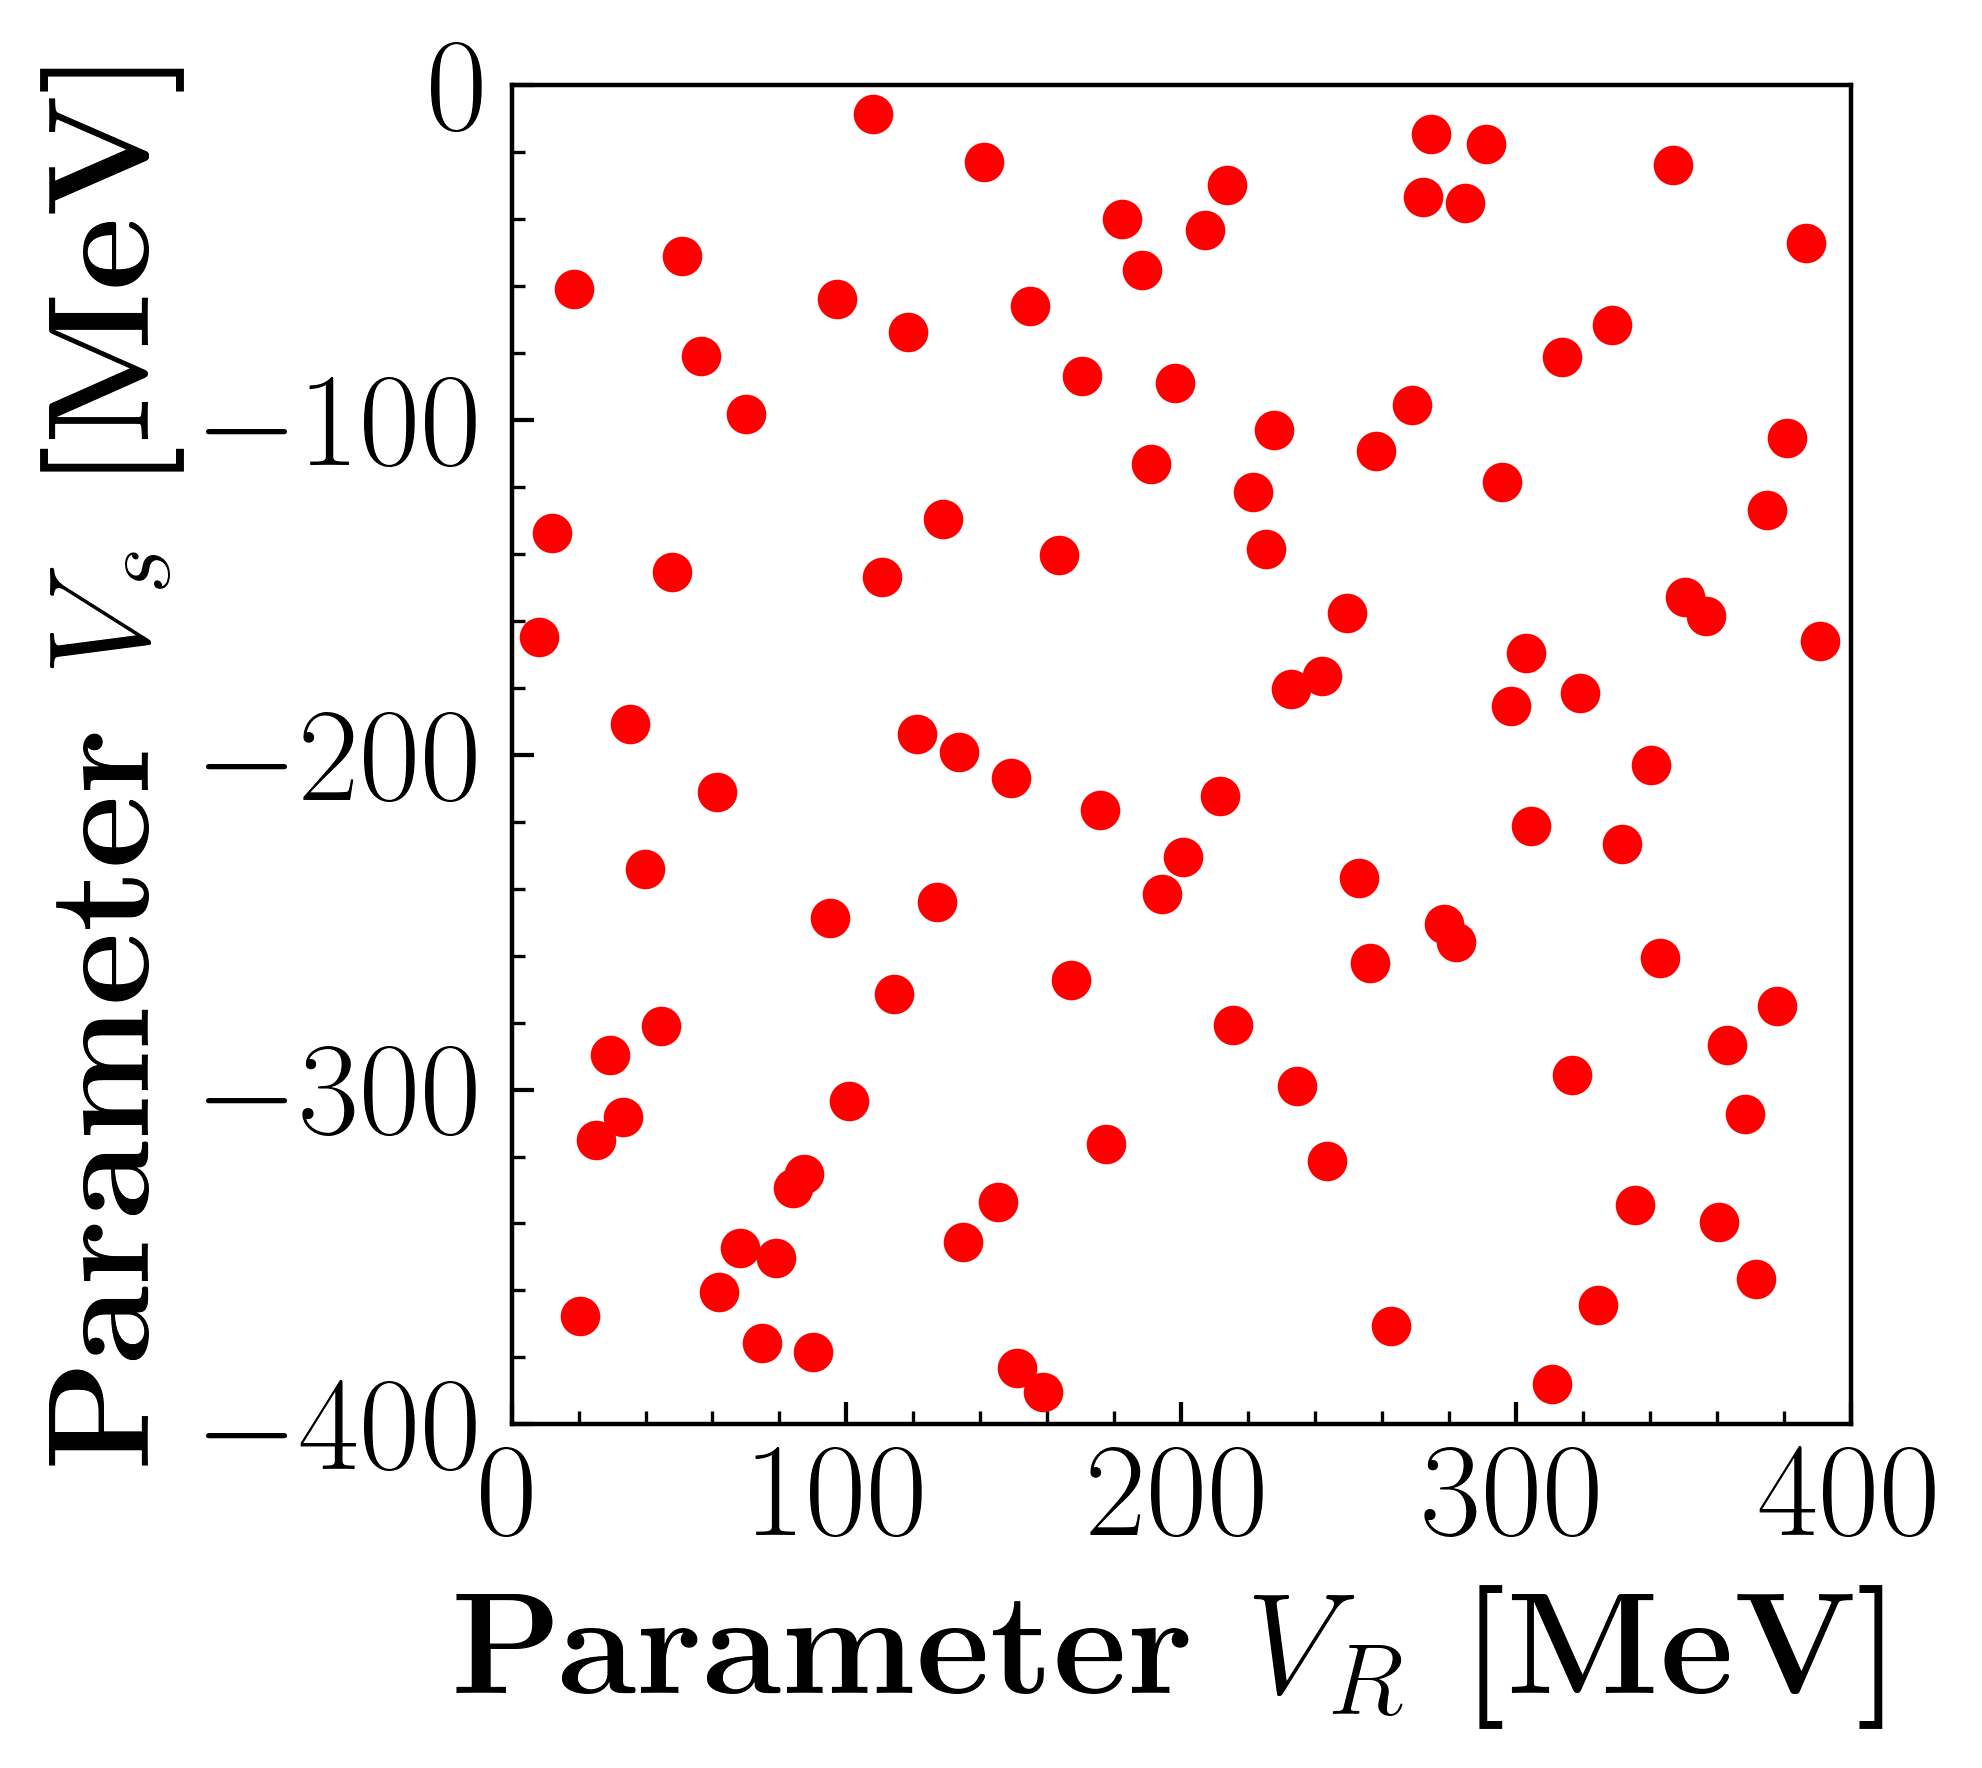

In [26]:
start_index = 0
number_of_indices = 100

fig, ax = plt.subplots(1, 1, dpi=dpi, figsize=(5, 5))

# ax.scatter(parameter_space["V_r"], parameter_space["V_s"], s=2, color="green")
for j in np.arange(start_index, start_index + number_of_indices):
    ax.scatter(parameter_space["V_r"][j],
                parameter_space["V_s"][j], color="red", s=40)

ax.set_xlabel(r"\textbf{Parameter  $V_R$ [MeV]}", fontsize=tick_size + 2)
ax.set_ylabel(r"\textbf{Parameter  $V_s$ [MeV]}", fontsize=tick_size + 2)
# ax.set_xlabel("Parameter  $V_R$ [MeV]", fontsize=tick_size + 4)
ax.set_xlim(np.min(parameter_space["V_r"]) - buffer, 
         np.max(parameter_space["V_r"]) + buffer)
ax.set_xticks([0, 100, 200, 300, 400])
# ax.set_ylabel("Parameter  $V_s$ [MeV]", fontsize=tick_size + 4)
ax.set_ylim(np.min(parameter_space["V_s"]) - buffer, 
         np.max(parameter_space["V_s"]) + buffer)
ax.set_yticks([-400, -300, -200, -100, 0])

ax.xaxis.set_tick_params(labelsize=tick_size)
ax.yaxis.set_tick_params(labelsize=tick_size)

ax.set_aspect('equal')
plt.tight_layout()
if save_figures:
    plt.savefig(f"./figures/pod_bold.png")
plt.show()


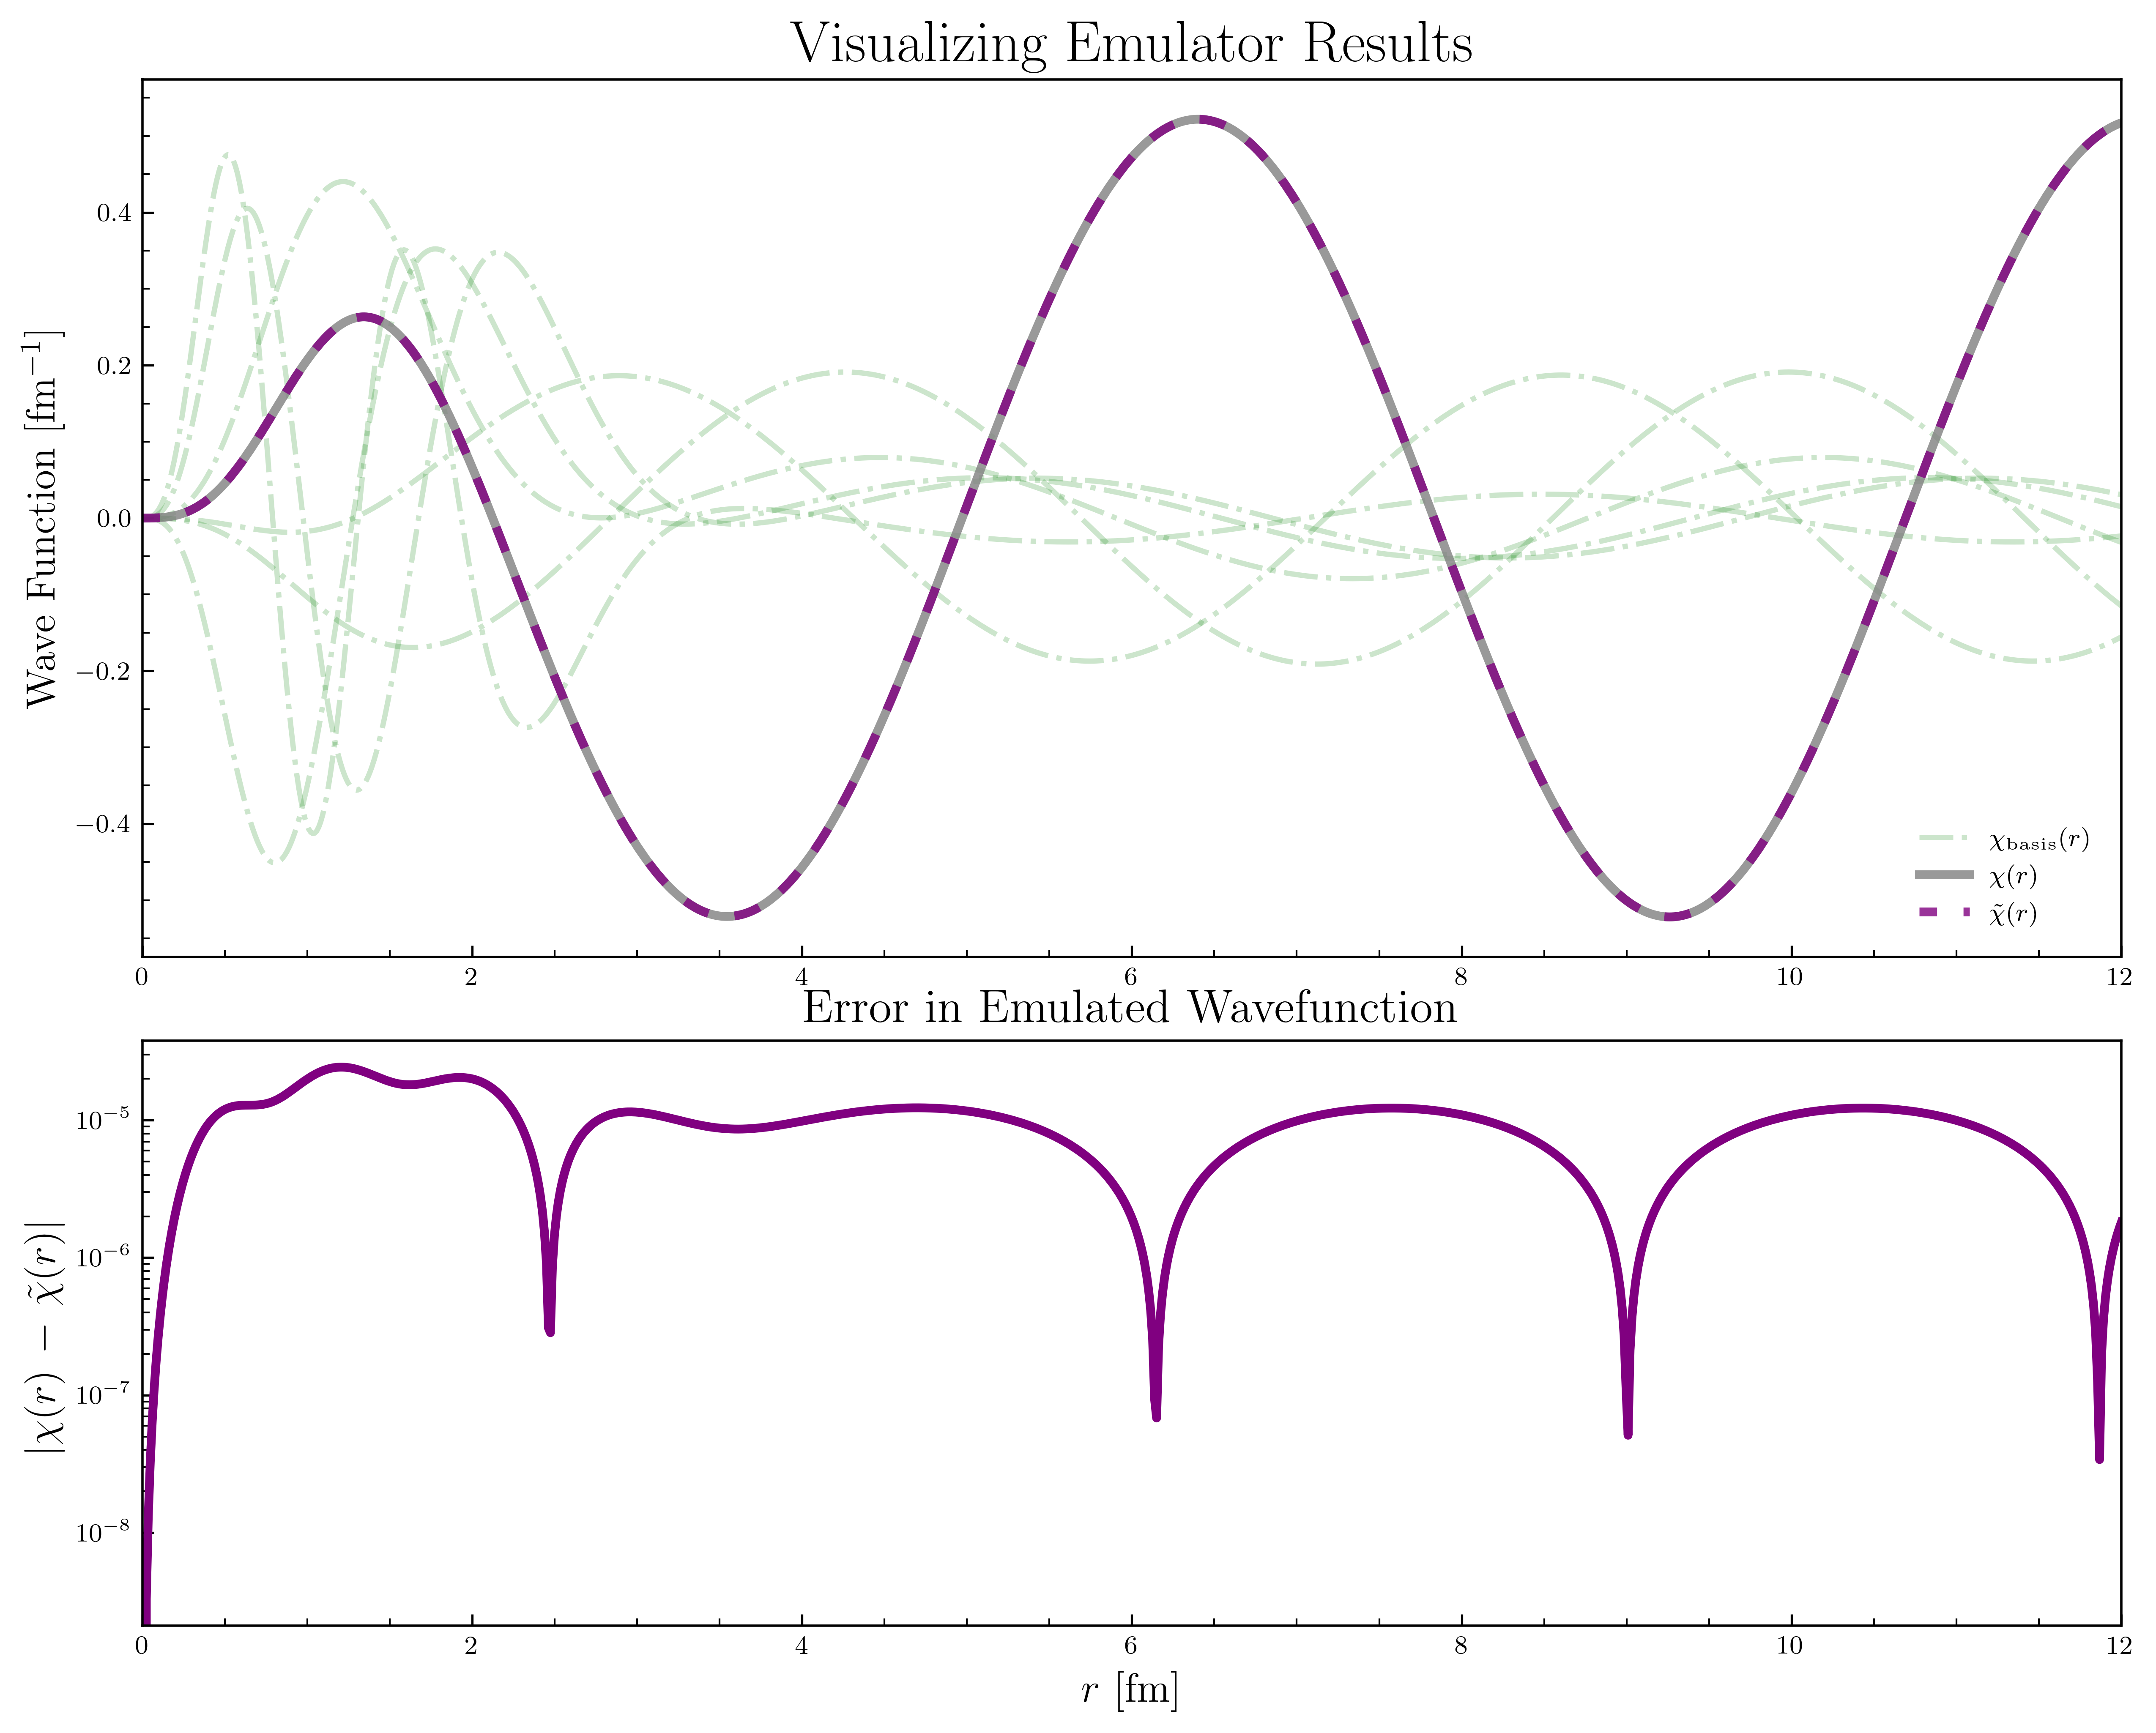

In [27]:
theta = potential.default_theta

greedy_emulator.emulation_errors_at_theta(theta, basis_scaling=4)